In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.cluster.hierarchy as sch
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import norm
from scipy.optimize import minimize

df = pd.read_csv("./Clean/otp.csv")
df = df.drop(columns=['Unnamed: 0'])
df.set_index('Dátum', inplace=True)
df = df[::-1]
df = df[df.index >= '2018-03-09']
annual_risk_free_rate = 0.055
daily_risk_free_rate = (1 + annual_risk_free_rate)**(1/252) - 1

benchmark = 'S&P 500'
# benchmark = 'USDHUF=X'
# interesting = ['Citadella_Származtatott_Relative_Return', 'Erste_Stock_Hungary_Indexkövető_Részvény_A_Relative_Return',
#                'SP500_Relative_Return', 'HOLD_Nemzetközi_Relative_Return', 'OTP_Supra_Relative_Return', 'HOLD_Columbus_Relative_Return']
# Create a dictionary to rename the columns to something simpler

rename_dict = {
    'OTP Abszolút Hozamú Származtatott Alap': 'OTP Abszolút',
    'OTP Fundman Részvény Alap': 'OTP Fundman',
    'OTP Ingatlanbefektetési Alap': 'OTP Ingatlan',
    'OTP Ingatlanvilág Alapok Alapja': 'OTP Ingatlanvilág',
    'OTP Klímaváltozás 13030 Származtatott Részvény Alap': 'OTP Klímaváltozás',
    'OTP Maxima Kötvény Alap': 'OTP Maxima',
    'OTP PRÉMIUM AKTÍV KLASSZIKUS VEGYES ALAPOK ALAPJA BEF J': 'OTP Prémium Aktív',
    'OTP SIGMA SZÁRMAZTATOTT ABSZOLÚT HOZAMÚ ALAP A SOROZAT BEF. JEGY': 'OTP Sigma',
    'SPY': 'S&P 500',
    'USDHUF=X': 'USD/HUF',
    'OTP Tőkegarantált Rövid Kötvény Alap': 'OTP Tőkegarantált Rövid Kötvény Alap'
}


df_relative_returns = df.copy()
relative_return_columns = []
for column in df_relative_returns.columns:
    new_column = column + '_'
    df_relative_returns[column] = df_relative_returns[column] / df_relative_returns[column].iloc[0]
    
df=df_relative_returns
# df=df_relative_returns
# interesting = ['Citadella', 'Gránit Apollo','HOLD Columbus', 'HOLD Orion', 'Platina Delta', 'Accorde Prizma', 'OTP Supra', 'Erste Duett', benchmark ]

df = df.rename(columns=rename_dict)
# df = df.rename(columns=rename_dict)

# df = df[interesting]
daily_returns = df.pct_change().dropna()


In [101]:
df.columns

Index(['OTP Abszolút', 'OTP Fundman', 'OTP Ingatlan', 'OTP Ingatlanvilág',
       'OTP Klímaváltozás', 'OTP Maxima', 'OTP Prémium Aktív', 'OTP Sigma',
       'S&P 500', 'USD/HUF'],
      dtype='object')

In [102]:

df_fee = (daily_returns+1).cumprod()



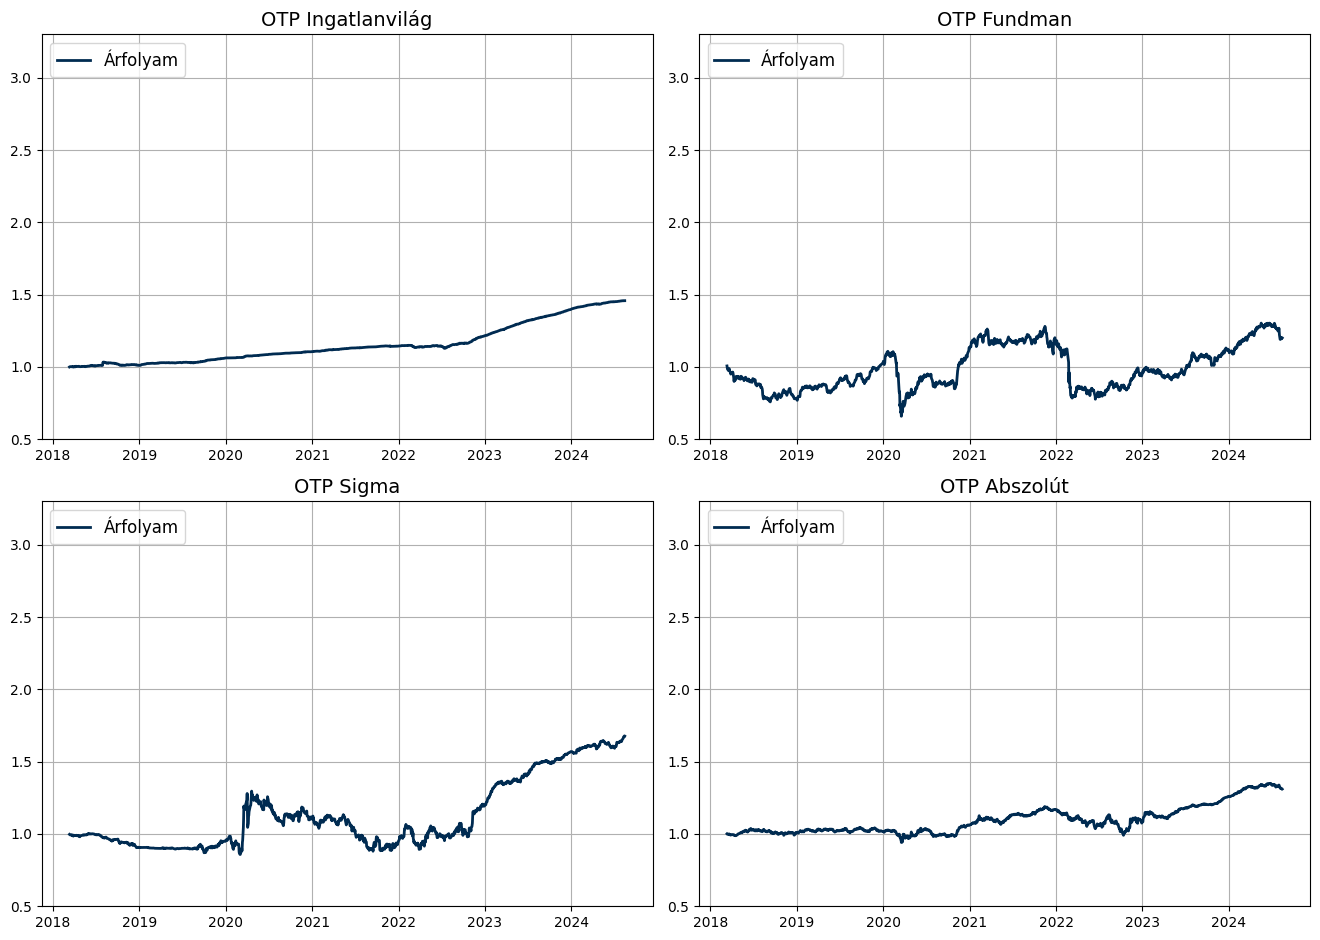

In [103]:
colors = {
    "Blue-20%": "#D1E4F1",
    "Blue-40%": "#A3CAE3",
    "Blue-80%": "#4695C8",
    "Blue": "#187ABA",
    "Navy-20%": "#CCD5DC",
    "Navy-40%": "#99AAB9",
    "Navy-80%": "#335574",
    "Navy": "#002B51"
}
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()
for i, col in enumerate(['OTP Ingatlanvilág', 'OTP Fundman', 'OTP Sigma', 'OTP Abszolút']):
    axs[i].plot(pd.to_datetime(df_fee.index), df_fee[col], label='Árfolyam', color=colors["Navy"], linestyle='-', linewidth=2)
    # axs[i].plot(pd.to_datetime(df.index), df[col], label='Árfolyam', color=colors["Blue-40%"], linestyle='-', linewidth=2)
    axs[i].set_title(col, fontsize=14)
    if col == "Citadella":
        axs[i].axvline(pd.to_datetime('2020-03-16'), color='red', linestyle='--', label='COVID Crash')

    axs[i].legend(loc='upper left', fontsize=12)

    # Fix the y-axis resolution (optional: customize as needed)
    axs[i].set_ylim([0.5, 3.3])
    axs[i].grid(True)
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.savefig('../../../static/Befalapok2/dijak.svg', format='svg')
plt.show()

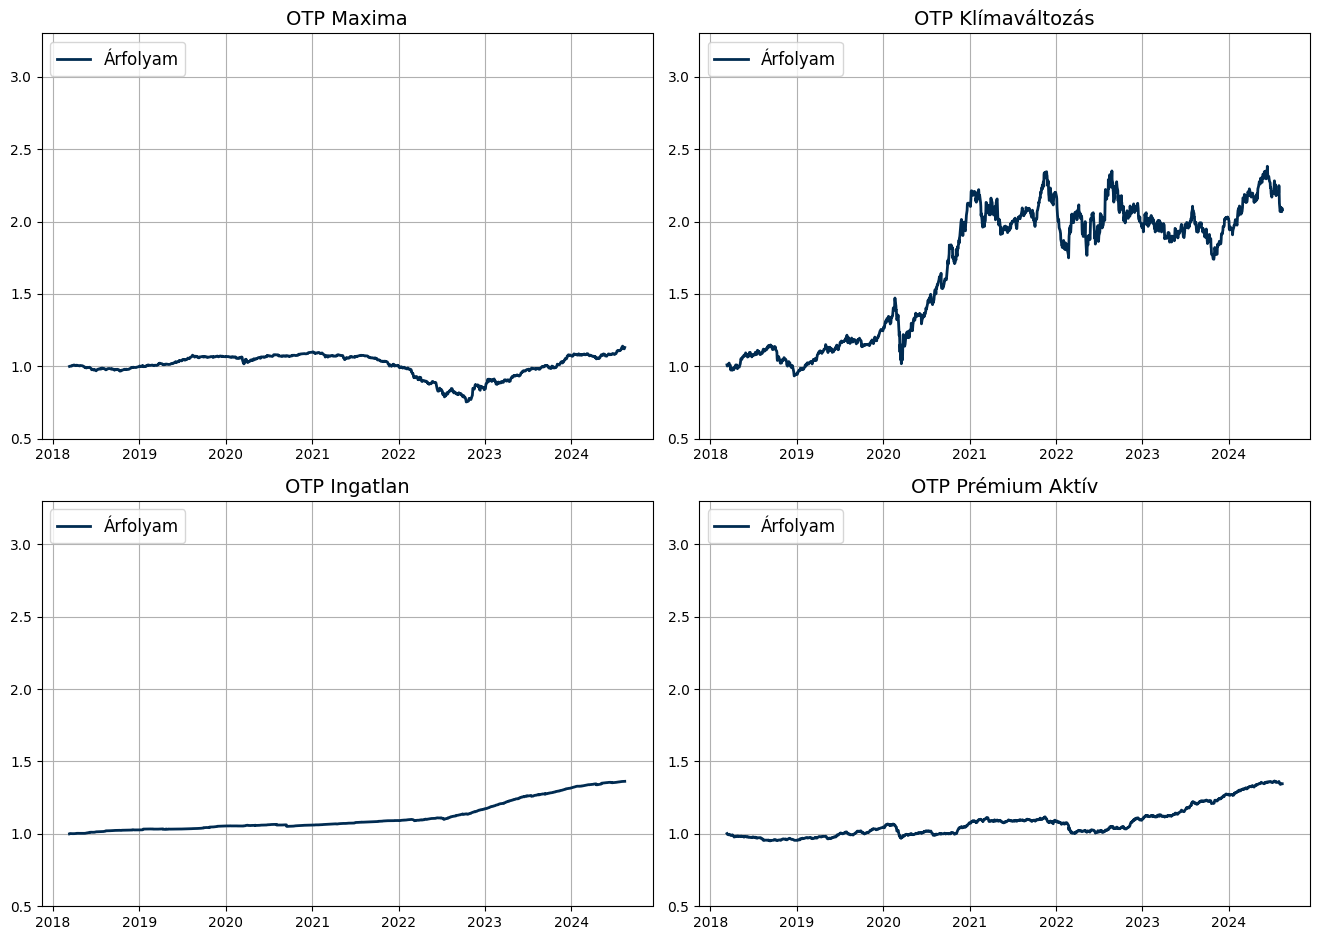

In [104]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, col in enumerate(['OTP Maxima', 'OTP Klímaváltozás', 'OTP Ingatlan', 'OTP Prémium Aktív']):
    axs[i].plot(pd.to_datetime(df_fee.index), df_fee[col], label='Árfolyam', color=colors["Navy"], linestyle='-', linewidth=2)
    # axs[i].plot(pd.to_datetime(df.index), df[col], label='Árfolyam', color=colors["Blue-40%"], linestyle='-', linewidth=2)
    axs[i].set_title(col, fontsize=14)
    axs[i].legend(loc='upper left', fontsize=12)
    
    # Fix the y-axis resolution (optional: customize as needed)
    axs[i].set_ylim([0.5, 3.3])
    axs[i].grid(True)
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.savefig('../../../static/Befalapok2/dijak_2.svg', format='svg')
plt.show()

In [105]:
df = df_fee
daily_returns = df.pct_change().dropna()


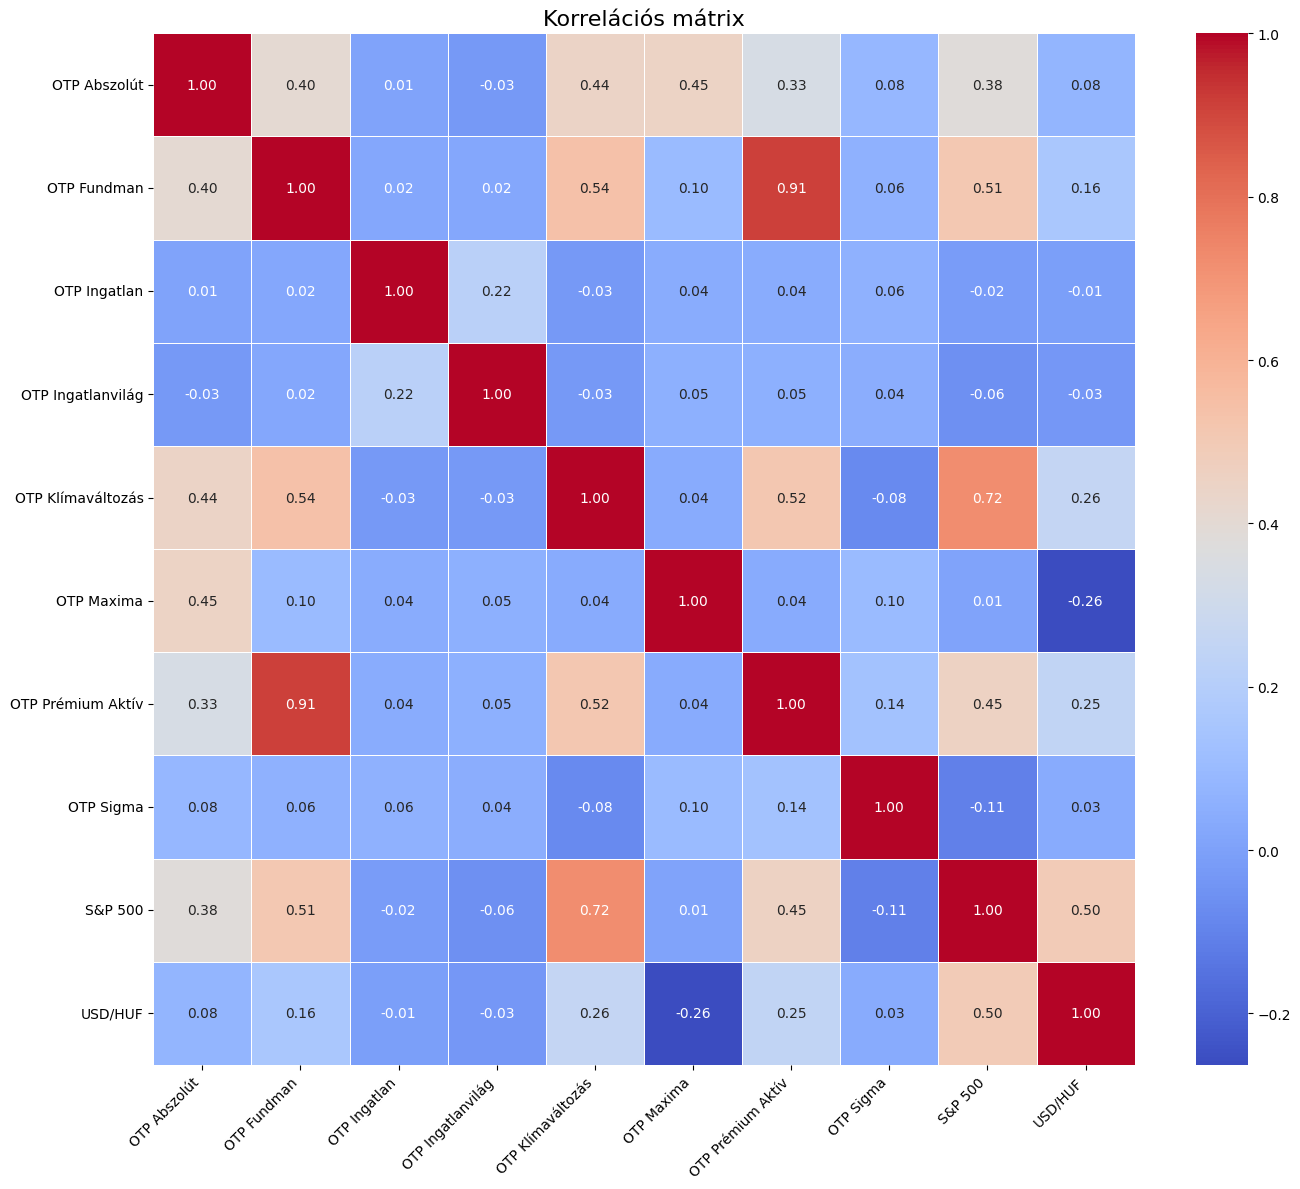

In [106]:
correlation_matrix = daily_returns.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korrelációs mátrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('../../../static/Befalapok2/korrelacio.svg', format='svg')
plt.show()

In [107]:
correlation_matrix

,OTP Abszolút,OTP Fundman,OTP Ingatlan,OTP Ingatlanvilág,OTP Klímaváltozás,OTP Maxima,OTP Prémium Aktív,OTP Sigma,S&P 500,USD/HUF
OTP Abszolút,1.000000,0.404464,0.005286,-0.026822,0.443796,0.449020,0.334871,0.083328,0.380269,0.076930
OTP Fundman,0.404464,1.000000,0.019138,0.022235,0.539046,0.099497,0.912950,0.059233,0.507523,0.159887
OTP Ingatlan,0.005286,0.019138,1.000000,0.215872,-0.029474,0.040871,0.037979,0.061110,-0.021349,-0.009020
OTP Ingatlanvilág,-0.026822,0.022235,0.215872,1.000000,-0.029273,0.054797,0.054894,0.043011,-0.058103,-0.032929
OTP Klímaváltozás,0.443796,0.539046,-0.029474,-0.029273,1.000000,0.035961,0.515369,-0.079491,0.723538,0.258639
OTP Maxima,0.449020,0.099497,0.040871,0.054797,0.035961,1.000000,0.035562,0.099522,0.005639,-0.263194
OTP Prémium Aktív,0.334871,0.912950,0.037979,0.054894,0.515369,0.035562,1.000000,0.135269,0.453033,0.247049
OTP Sigma,0.083328,0.059233,0.061110,0.043011,-0.079491,0.099522,0.135269,1.000000,-0.105901,0.034654
S&P 500,0.380269,0.507523,-0.021349,-0.058103,0.723538,0.005639,0.453033,-0.105901,1.000000,0.495369
USD/HUF,0.076930,0.159887,-0.009020,-0.032929,0.258639,-0.263194,0.247049,0.034654,0.495369,1.000000


In [108]:
# spy_correlated = ['S&P 500','Generali ESG', 'HOLD Nemzetközi', 'MBH Fejlett Piaci', 'OTP Klímaváltozás', 'Gránit Apollo','VIG Opportunity'  ]
# correlation_matrix = daily_returns[spy_correlated].corr()
# plt.figure(figsize=(14, 12))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Correlation Matrix Heatmap', fontsize=16)
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()

In [109]:
# spy_correlated = ['S&P 500','Citadella', 'HOLD Columbus','HOLD Orion','Accorde Prizma', ]
# correlation_matrix = daily_returns[spy_correlated].corr()
# plt.figure(figsize=(14, 12))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Correlation Matrix Heatmap', fontsize=16)
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()

In [110]:
import matplotlib.cm as cm

def draw_decreasing_barchart(data, title, x_label, y_label, path=None):
    # Sort data in descending order
    data = data.sort_values(ascending=False)
    
    # Determine the number of bars
    num_bars = len(data)

    # Generate colors using the Blues colormap
    blues_colormap = cm.Blues(np.linspace(0.9, 0.2, num_bars))  # Adjust the range as needed for color depth

    # Assign colors to each bar, highlight 'S&P 500' in red
    bar_colors = ['red' if idx == 'S&P 500' else blues_colormap[i] for i, idx in enumerate(data.index)]
    
    # Create the bar chart
    plt.figure(figsize=(14, 8))
    bars = data.plot(kind='bar', color=bar_colors, edgecolor='black')
    
    # Rotate x labels for better spacing
    plt.xticks(rotation=45, ha='right', fontsize=12, )
    
    # Apply titles and labels with improved styling
    plt.title(title, fontsize=20, pad=20)  # Navy with padding
    plt.xlabel(x_label, fontsize=16, labelpad=10)  # Navy-80% with padding
    plt.ylabel(y_label, fontsize=16,  labelpad=10)  # Navy-80% with padding
    
    # Set grid and customize its color
    plt.grid(axis='y', linestyle='--', linewidth=0.7, color='#99AAB9')  # Navy-40%
    
    # Remove the box around the plot for a cleaner look
    # plt.gca().spines['top'].set_visible(False)
    # plt.gca().spines['right'].set_visible(False)
    # plt.gca().spines['left'].set_color('#335574')  # Navy-80%
    # plt.gca().spines['bottom'].set_color('#335574')  # Navy-80%
    
    # Tight layout for better spacing
    plt.tight_layout()
    
    if path:
        plt.savefig(path, format='svg')
    else:
        # Show the plot
        plt.show()
    
def draw_linechart(data, title, x_label, y_label, benchmark='S&P 500', path=None):

    
    plt.figure(figsize=(12, 8))
    
    # Plot each column with varying colors
    num_colors = len(data.columns) - 1

    blues_colormap = cm.Blues(np.linspace(0.3, 0.8, num_colors))  # Adjust the range as needed for color depth

    # Plot each column with varying colors
    for i, column in enumerate(data.columns):
        if column == benchmark:
            plt.plot(pd.to_datetime(data.index), data[column], label=column, color='red', linewidth=2.5)
        else:
            plt.plot(pd.to_datetime(data.index), data[column], label=column, color=blues_colormap[i % num_colors], linewidth=2)

    # Add the COVID Crash line
    plt.axvline(pd.to_datetime('2020-03-16'), color='red', linestyle='--', linewidth=1.5, label='Covid krach')

    # Apply titles and labels with improved styling
    plt.title(title, fontsize=18, )  # Navy
    plt.xlabel(x_label, fontsize=14, )  # Navy-80%
    plt.ylabel(y_label, fontsize=14, )  # Navy-80%
    
    # Display the legend
    plt.legend(loc='upper left', fontsize=12)
    
    # Set grid and customize its color
    plt.grid(True, linestyle='--', linewidth=0.7, color='#99AAB9')  # Navy-40%
    
    # Tight layout for better spacing
    plt.tight_layout()
    
    if path:
        plt.savefig(path, format='svg')
    else:
        # Show the plot
        plt.show()

In [111]:
# plt.plot(pd.to_datetime(df.index), df['Citadella'], label=column)

# plt.axvline(pd.to_datetime('2020-03-16'), color='red', linestyle='--', label='COVID Crash')
# # plt.title(title)
# # plt.xlabel(x_label)
# plt.legend()
# # plt.ylabel(y_label)
# plt.grid(True)
# plt.show()

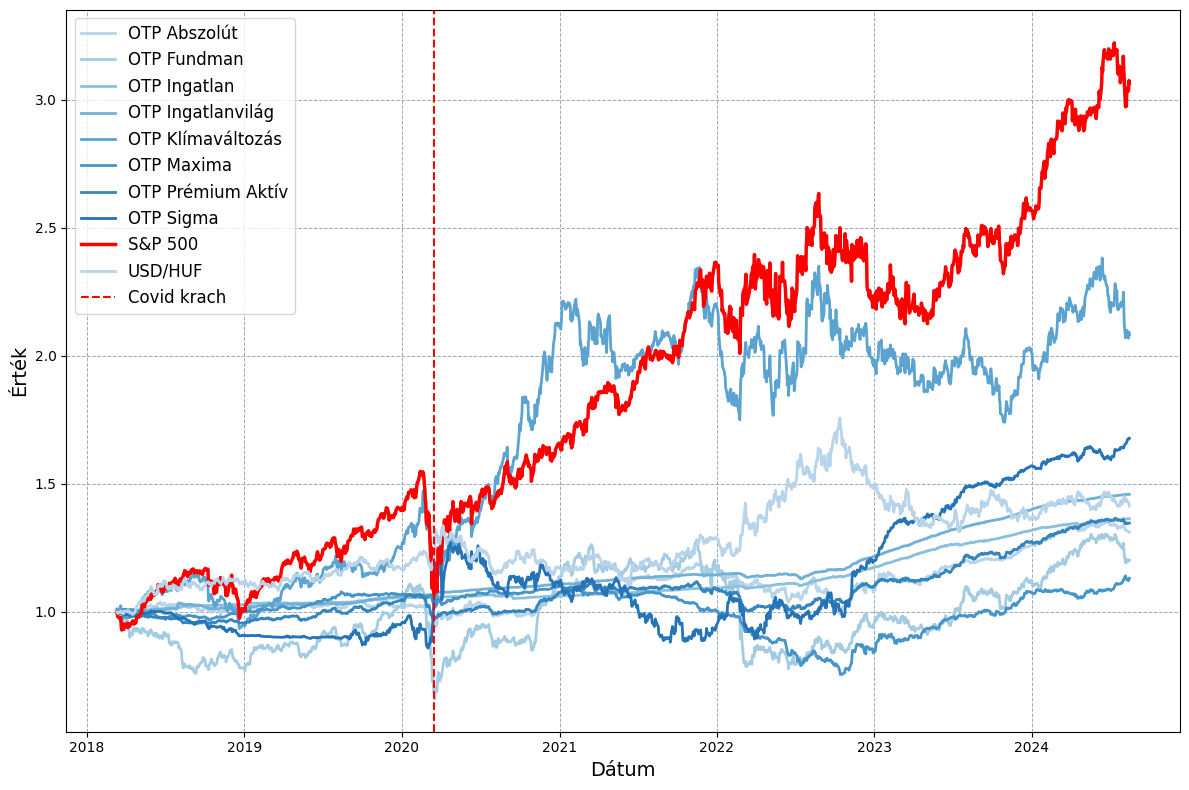

In [112]:
draw_linechart(df, '', 'Dátum', 'Érték' ,path='../../../static/Befalapok2/hozamok-oszi.svg' )

In [113]:
df

,OTP Abszolút,OTP Fundman,OTP Ingatlan,OTP Ingatlanvilág,OTP Klímaváltozás,OTP Maxima,OTP Prémium Aktív,OTP Sigma,S&P 500,USD/HUF
Dátum,,,,,,,,,,
2018-03-12,1.000880,1.007029,0.999951,1.000006,1.010409,0.999787,1.002004,0.997270,0.998142,0.999396
2018-03-13,0.999184,0.995266,1.000286,1.001512,1.002532,1.000412,0.998915,0.995998,0.990017,0.997709
2018-03-14,0.997634,0.985380,1.002253,1.002008,1.003209,1.001090,0.996357,0.993843,0.980103,0.992812
2018-03-19,0.998200,0.973846,1.001639,1.002287,1.012324,1.002225,0.993658,0.993194,0.973220,0.999368
2018-03-20,0.998593,0.977647,1.001647,1.002530,1.021825,1.002669,0.994702,0.992362,0.971604,0.996015
...,...,...,...,...,...,...,...,...,...,...
2024-08-08,1.315845,1.199393,1.361951,1.458483,2.099158,1.125998,1.345674,1.663046,3.041901,1.436638
2024-08-09,1.314706,1.194813,1.362221,1.458047,2.088652,1.122809,1.344074,1.671246,3.045799,1.432163
2024-08-12,1.314106,1.198483,1.362240,1.458024,2.068122,1.120830,1.344987,1.673959,3.034054,1.425891


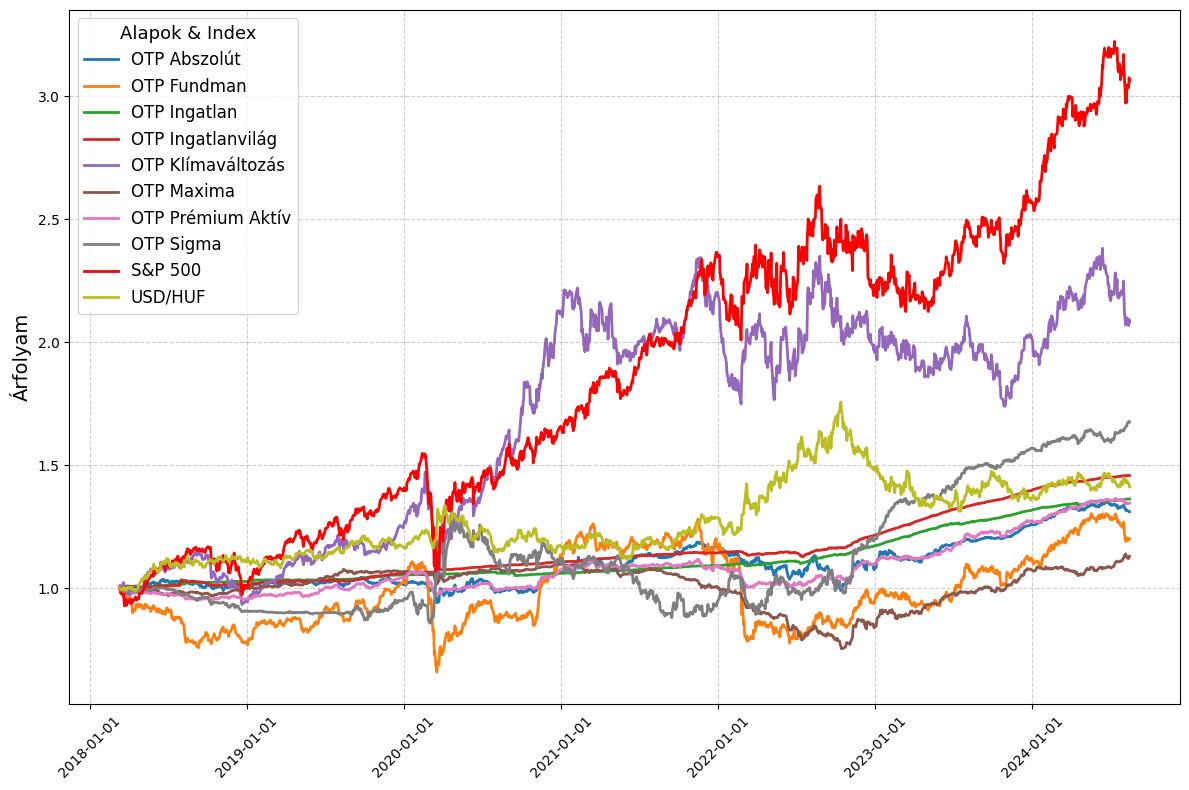

In [114]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is already defined as per the provided data structure
# Convert 'Dátum' index to datetime format if not already
df.index = pd.to_datetime(df.index)

plt.figure(figsize=(12, 8))

# Plot each column with specific styling for 'S&P 500'
for column in df.columns:
    if column == 'S&P 500':
        plt.plot(df.index, df[column], linestyle='-', linewidth=2, color='red', label=column)
    else:
        plt.plot(df.index, df[column], linestyle='-', linewidth=2, label=column)

# Adding title and labels
plt.title('', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Árfolyam', fontsize=14)

# Customize the grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Alapok & Index', fontsize=12, title_fontsize='13')

# Reduce the number of x-axis ticks to avoid clutter
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator(maxticks=10))

# Improve date formatting on x-axis
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../../../static/Befalapok2/hozamok.svg', format='svg')

plt.show()


In [115]:

# plt.figure(figsize=(12, 8))

# # Plot each column with varying colors
# num_colors = len(data.columns) - 1

# blues_colormap = cm.Blues(np.linspace(0.3, 0.8, num_colors))  # Adjust the range as needed for color depth

# # Plot each column with varying colors
# for i, column in enumerate(data.columns):
#     if column == benchmark:
#         plt.plot(pd.to_datetime(data.index), data[column], label=column, color='red', linewidth=2.5)
#     else:
#         plt.plot(pd.to_datetime(data.index), data[column], label=column, color=blues_colormap[i % num_colors], linewidth=2)

# # Add the COVID Crash line
# plt.axvline(pd.to_datetime('2020-03-16'), color='red', linestyle='--', linewidth=1.5, label='Covid krach')

# # Apply titles and labels with improved styling
# plt.title(title, fontsize=18, )  # Navy
# plt.xlabel(x_label, fontsize=14, )  # Navy-80%
# plt.ylabel(y_label, fontsize=14, )  # Navy-80%

# # Display the legend
# plt.legend(loc='upper left', fontsize=12)

# # Set grid and customize its color
# plt.grid(True, linestyle='--', linewidth=0.7, color='#99AAB9')  # Navy-40%

# # Tight layout for better spacing
# plt.tight_layout()

# if path:
#     plt.savefig(path, format='svg')
# else:
#     # Show the plot
#     plt.show()

In [116]:
average_daily_returns = daily_returns.mean()
excess_returns = average_daily_returns - daily_risk_free_rate
std_dev_returns = daily_returns.std()
sharpe_ratios_daily = excess_returns / std_dev_returns
sharpe_ratios_annualized = sharpe_ratios_daily * np.sqrt(252)
sharpe_ratios_df = pd.DataFrame({
    'Average Daily Return': average_daily_returns,
    'Standard Deviation of Returns': std_dev_returns,
    'Daily Sharpe Ratio': sharpe_ratios_daily,
    'Annualized Sharpe Ratio': sharpe_ratios_annualized
})
sharpe_ratios_df

,Average Daily Return,Standard Deviation of Returns,Daily Sharpe Ratio,Annualized Sharpe Ratio
OTP Abszolút,0.000183,0.004661,-0.006256,-0.099307
OTP Fundman,0.000193,0.012608,-0.001510,-0.023973
OTP Ingatlan,0.000198,0.000647,-0.021889,-0.347482
OTP Ingatlanvilág,0.000242,0.000891,0.032867,0.521741
OTP Klímaváltozás,0.000556,0.013658,0.025159,0.399393
OTP Maxima,0.000086,0.003932,-0.032079,-0.509239
OTP Prémium Aktív,0.000194,0.003029,-0.006247,-0.099175
OTP Sigma,0.000387,0.010445,0.016717,0.265368
S&P 500,0.000824,0.014559,0.042007,0.666848
USD/HUF,0.000251,0.007777,0.005014,0.079587


In [117]:
(1+daily_returns.mean())**252

OTP Abszolút         1.047278
OTP Fundman          1.049951
OTP Ingatlan         1.051243
OTP Ingatlanvilág    1.062814
OTP Klímaváltozás    1.150392
OTP Maxima           1.022000
OTP Prémium Aktív    1.049982
OTP Sigma            1.102441
S&P 500              1.230700
USD/HUF              1.065415
dtype: float64

In [118]:
daily_returns.std()

OTP Abszolút         0.004661
OTP Fundman          0.012608
OTP Ingatlan         0.000647
OTP Ingatlanvilág    0.000891
OTP Klímaváltozás    0.013658
OTP Maxima           0.003932
OTP Prémium Aktív    0.003029
OTP Sigma            0.010445
S&P 500              0.014559
USD/HUF              0.007777
dtype: float64

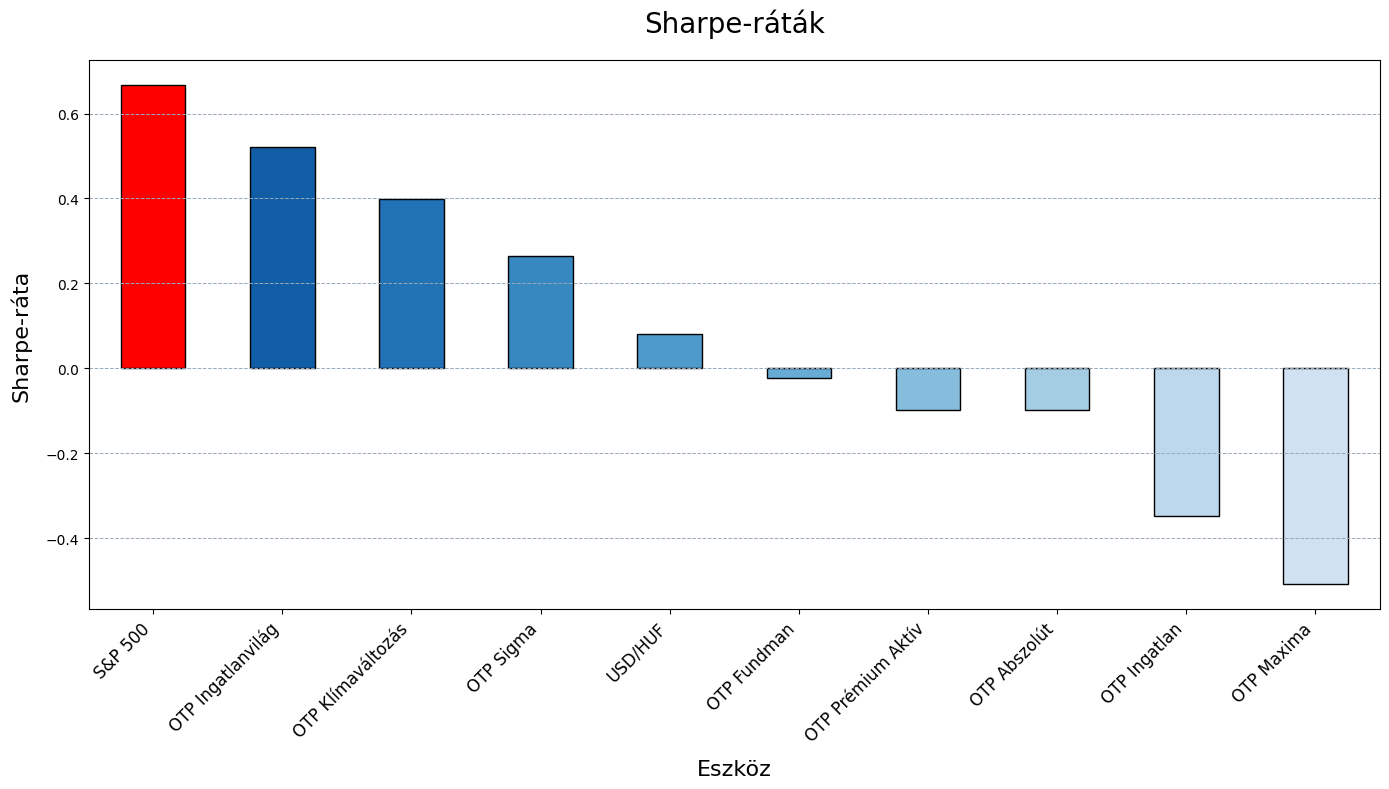

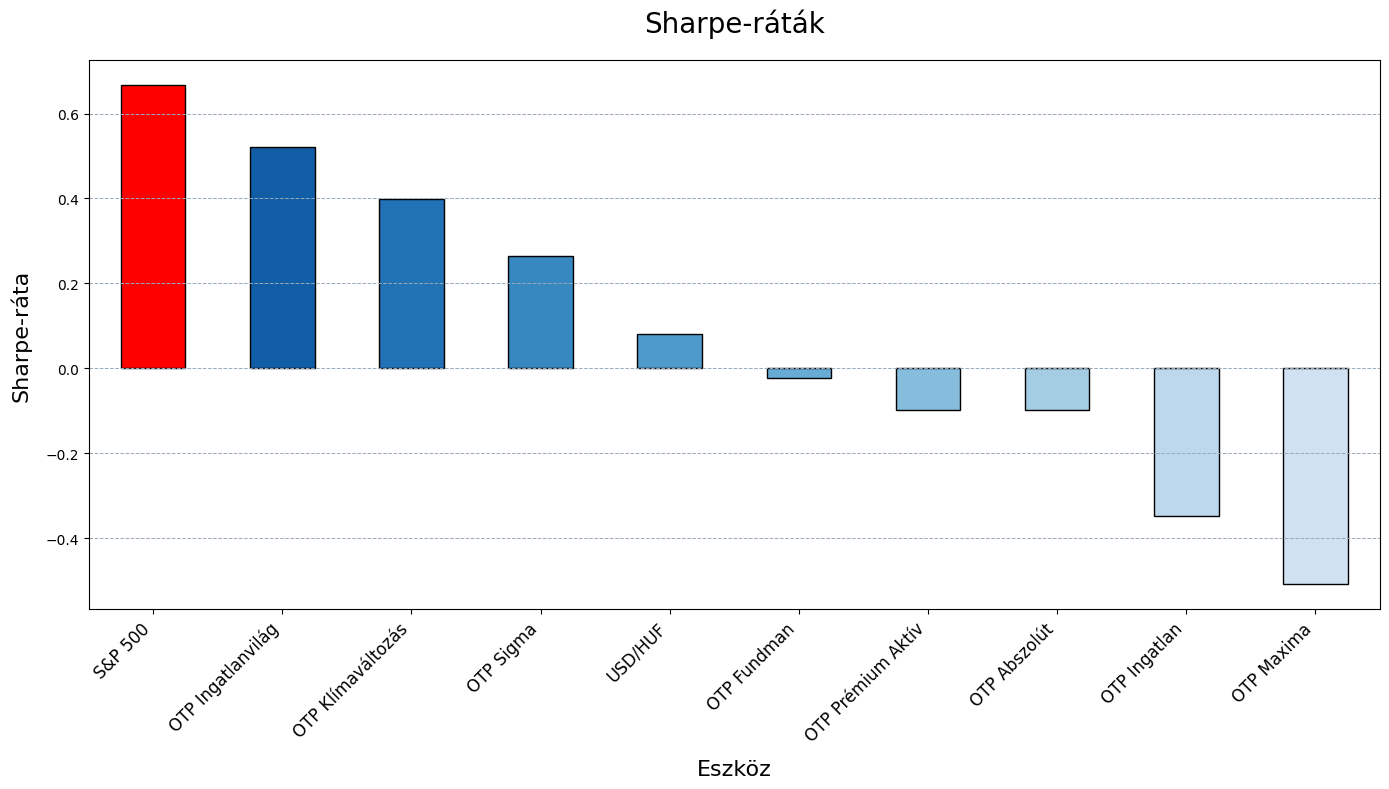

In [119]:
# sharpe_ratios_df = sharpe_ratios_df[interesting]
# Sort the Sharpesharpe_ratios_df Ratios in descending order for the bar chart
sorted_sharpe_ratios = sharpe_ratios_df['Annualized Sharpe Ratio'].sort_values(ascending=False)
draw_decreasing_barchart(sorted_sharpe_ratios, 'Sharpe-ráták', 'Eszköz', 'Sharpe-ráta',path='../../../static/Befalapok2/sharpe.svg' )

draw_decreasing_barchart(sorted_sharpe_ratios, 'Sharpe-ráták', 'Eszköz', 'Sharpe-ráta')


In [120]:
sorted_sharpe_ratios

S&P 500              0.666848
OTP Ingatlanvilág    0.521741
OTP Klímaváltozás    0.399393
OTP Sigma            0.265368
USD/HUF              0.079587
OTP Fundman         -0.023973
OTP Prémium Aktív   -0.099175
OTP Abszolút        -0.099307
OTP Ingatlan        -0.347482
OTP Maxima          -0.509239
Name: Annualized Sharpe Ratio, dtype: float64

Sortino Ratios:
 OTP Abszolút        -0.144162
OTP Fundman         -0.028145
OTP Ingatlan        -0.416265
OTP Ingatlanvilág    0.805860
OTP Klímaváltozás    0.554853
OTP Maxima          -0.696728
OTP Prémium Aktív   -0.129231
OTP Sigma            0.352495
S&P 500              0.876033
USD/HUF              0.122364
dtype: float64
Treynor Ratios:
 OTP Abszolút        -0.000239
OTP Fundman         -0.000043
OTP Ingatlan         0.014918
OTP Ingatlanvilág   -0.008230
OTP Klímaváltozás    0.000506
OTP Maxima          -0.082769
OTP Prémium Aktív   -0.000201
OTP Sigma           -0.002297
S&P 500              0.000611
USD/HUF              0.000147
dtype: float64


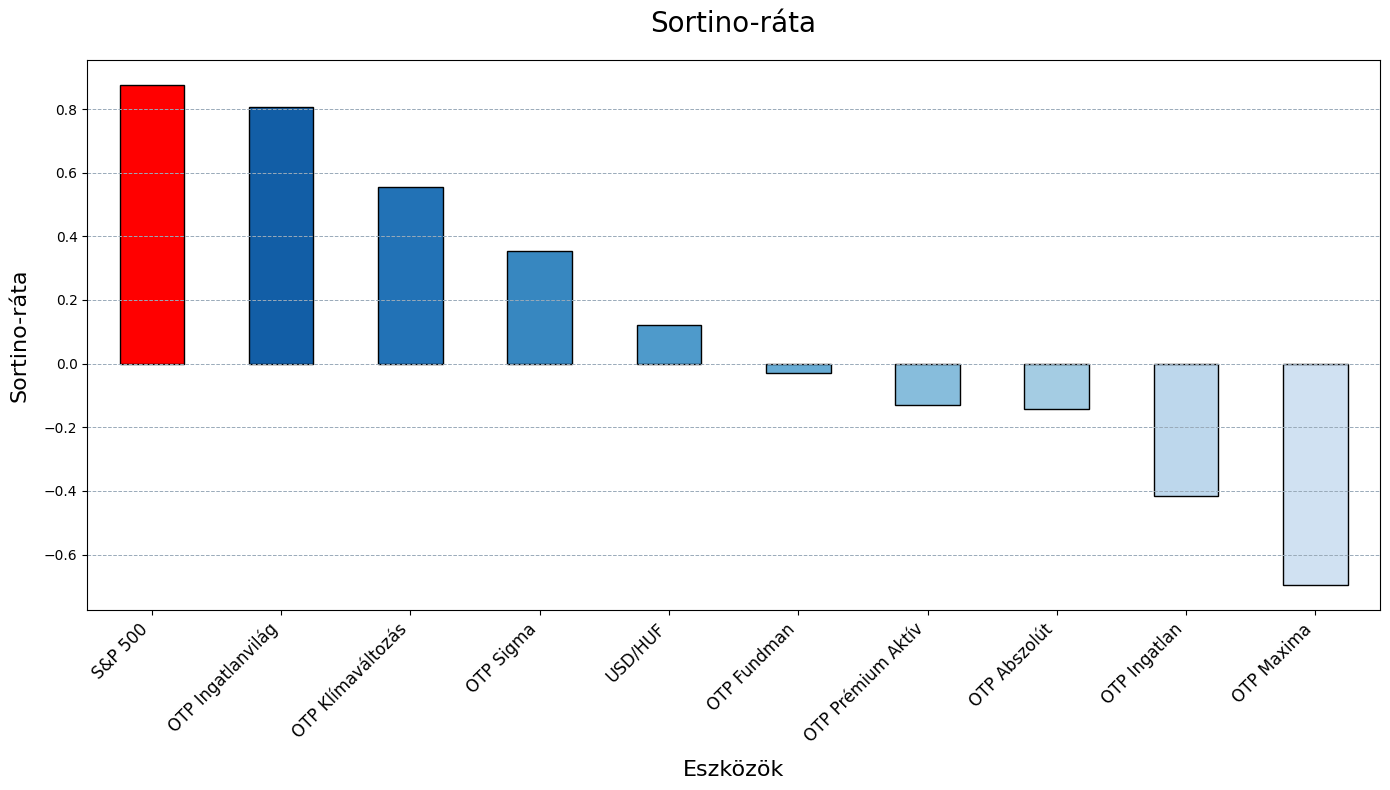

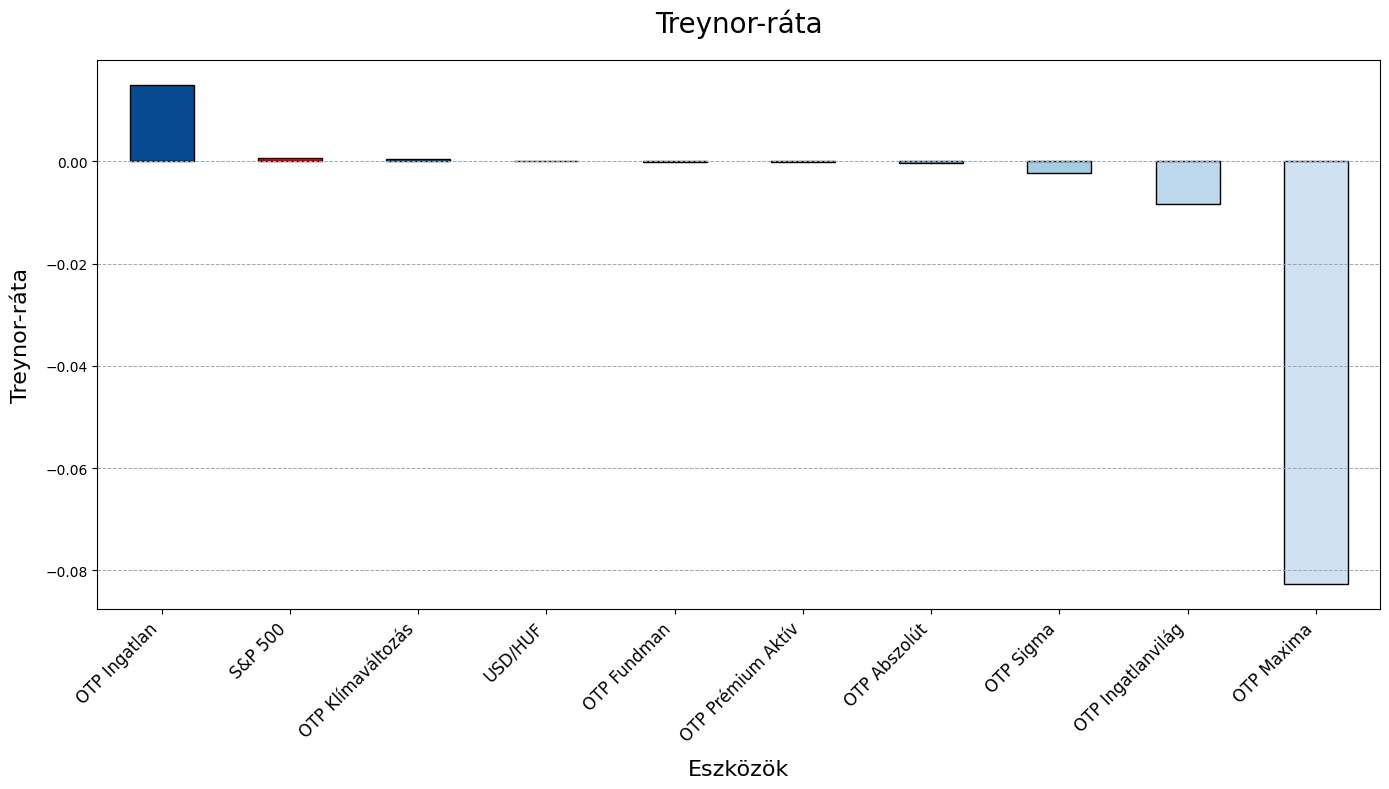

In [121]:
def sortino_ratio(returns, target=0):
    excess_returns = returns - target
    downside_deviation = np.std(excess_returns[excess_returns < target])
    sortino_ratio = np.mean(excess_returns) / downside_deviation
    sortino_ratio_annualized = sortino_ratio * np.sqrt(252)
    
    return sortino_ratio_annualized
sortino_ratios = daily_returns.apply(sortino_ratio, target=daily_risk_free_rate)
print("Sortino Ratios:\n", sortino_ratios)
draw_decreasing_barchart(sortino_ratios, 'Sortino-ráta', 'Eszközök', 'Sortino-ráta', path='../../../static/Befalapok2/sortino.svg')

def treynor_ratio(returns, market_returns, beta, daily_risk_free_rate):
    excess_returns = np.mean(returns) - daily_risk_free_rate
    treynor_ratio = excess_returns / beta
    return treynor_ratio

market_returns = daily_returns[benchmark]
betas = daily_returns.apply(lambda x: np.cov(x, market_returns)[0, 1] / np.var(market_returns))
treynor_ratios = daily_returns.apply(lambda x: treynor_ratio(x, market_returns, betas[x.name], daily_risk_free_rate))
print("Treynor Ratios:\n", treynor_ratios)
draw_decreasing_barchart(treynor_ratios, 'Treynor-ráta', 'Eszközök', 'Treynor-ráta',  path='../../../static/Befalapok2/treynor.svg')


In [122]:
# window_size = 252
# rolling_sharpe_ratios = (
#     daily_returns.rolling(window=window_size).mean() / 
#     daily_returns.rolling(window=window_size).std()
# ) * np.sqrt(252)
# draw_linchart(rolling_sharpe_ratios, 'Évesített Shapre-ráta', 'Dátum', 'Sharpe-ráta')


In [123]:
# rolling_correlations = daily_returns.rolling(window=window_size).corr(daily_returns[benchmark])
# draw_linchart(rolling_correlations, 'Korreláció változása', 'Dátum', 'Sharpe-ráta')


In [124]:
# benchmark_returns = daily_returns[benchmark]
# window_size = 252
# betas = pd.DataFrame(index=daily_returns.index)
# for column in daily_returns.columns:
#     if column != benchmark: 
#         rolling_covariance = daily_returns[column].rolling(window=window_size).cov(benchmark_returns)
#         rolling_variance = benchmark_returns.rolling(window=window_size).var()
#         rolling_beta = rolling_covariance / rolling_variance
#         betas[column] = rolling_beta    
# draw_linchart(betas, 'Rolling Béta', 'Dátum', 'Béta')


In [125]:
# alphas = pd.DataFrame(index=daily_returns.index)
# for column in daily_returns.columns:
#     if column != benchmark:  # Skip the benchmark itself
#         rolling_covariance = daily_returns[column].rolling(window=window_size).cov(benchmark_returns)
#         rolling_variance = benchmark_returns.rolling(window=window_size).var()
#         rolling_beta = rolling_covariance / rolling_variance
#         expected_returns = rolling_beta * (benchmark_returns.rolling(window=window_size).mean() - daily_risk_free_rate)
#         rolling_alpha = daily_returns[column].rolling(window=window_size).mean() - expected_returns
#         alphas[column] = rolling_alpha
# draw_linchart(alphas, 'Rolling Alfa', 'Dátum', 'Alfa')

In [126]:
# mean_alphas = alphas.mean()
# mean_alphas = mean_alphas.sort_values(ascending=False)
# print(mean_alphas)
# draw_decreasing_barchart(mean_alphas, 'Alfa', 'Eszköz', 'Alfa')

C:\Users\takat\AppData\Local\Temp\ipykernel_27872\434389705.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = sch.linkage(distance_matrix, method='average')


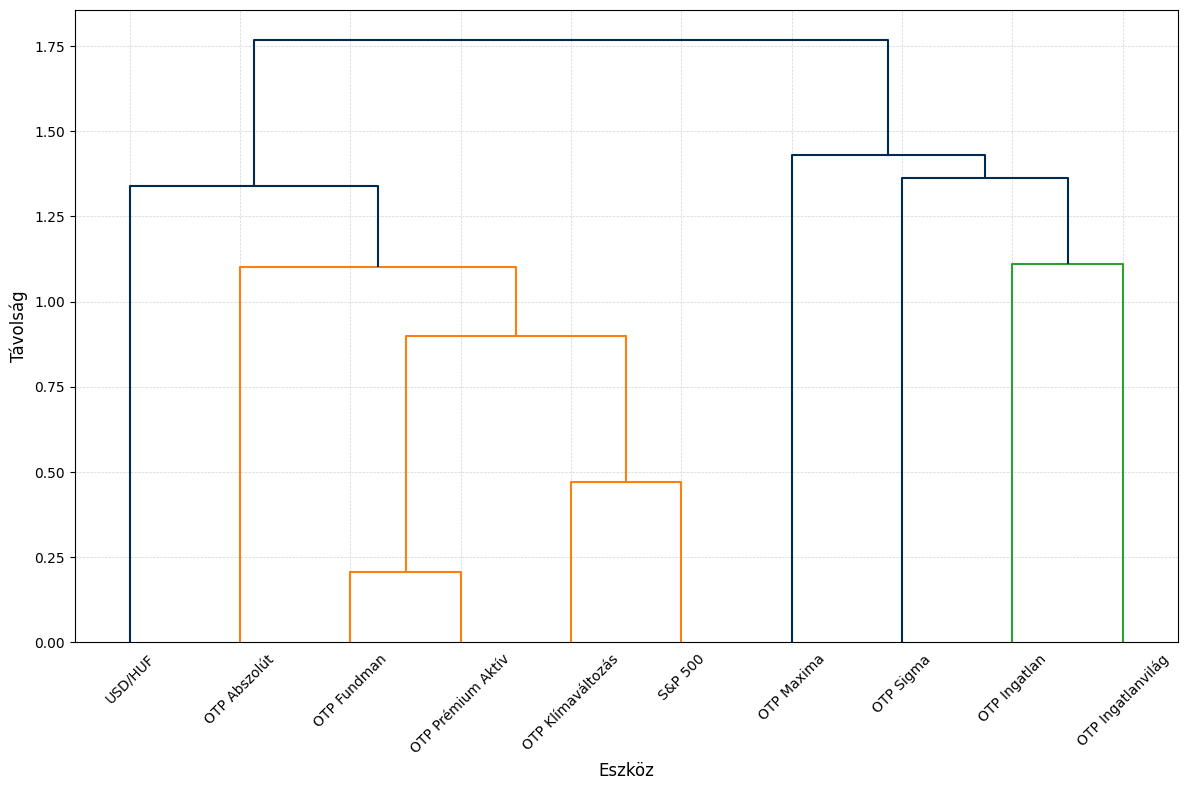

In [127]:
correlation_matrix = daily_returns.corr()
distance_matrix = 1 - correlation_matrix
linked = sch.linkage(distance_matrix, method='average')

# Set up the plot with improved styling
plt.figure(figsize=(12, 8))

# Dendrogram with custom styling
sch.dendrogram(
    linked,
    labels=correlation_matrix.columns,
    orientation='top',
    color_threshold=None,
    above_threshold_color='#002B51',  # Navy for the main branches
    leaf_rotation=45,
)

# Background and text settings
plt.gcf().set_facecolor('white')  # Background is white
# plt.title('Hierarchikus Klaszterezés Dendrogram (Korr)', fontsize=16, color='black')
plt.xlabel('Eszköz', fontsize=12, color='black')
plt.ylabel('Távolság', fontsize=12, color='black')
plt.xticks(rotation=45, fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

# Set the grid color and style
plt.grid(color='#CCD5DC', linestyle='--', linewidth=0.5)

# Adjust the layout for better spacing
plt.tight_layout()
plt.savefig('../../../static/Befalapok2/dendogram.svg', format='svg')

plt.show()

In [128]:
# monthly_returns = df.resample('M').last().pct_change().dropna()
# shapiro_test_results_monthly = {}
# x = np.linspace(-0.2, 0.2, 1000)
# plt.figure(figsize=(12, 8))
# for column in monthly_returns.columns:
#     try:
#         returns = monthly_returns[column].dropna()
#         W, p_value = shapiro(returns)
#         shapiro_test_results_monthly[column] = {
#             'W-statistic': W,
#             'p-value': p_value,
#             'is_normal': p_value > 0.05
#         }
#         mu, std = norm.fit(returns)
#         fitted_curve = norm.pdf(x, mu, std)
#         plt.plot(x, fitted_curve, label=f"{column} (p={p_value:.3f})")
#     except Exception as e:
#         shapiro_test_results_monthly[column] = {
#             'W-statistic': None,
#             'p-value': None,
#             'is_normal': False,
#             'error': str(e)
#         }
# plt.title('Fitted Normal Distributions for Each Monthly Return Series', fontsize=16)
# plt.xlabel('Monthly Returns', fontsize=12)
# plt.ylabel('Density', fontsize=12)
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.xlim(-0.1,0.1)
# plt.show()
# shapiro_test_results_monthly

In [129]:
# monthly_means = monthly_returns.mean()
# draw_decreasing_barchart(monthly_means, 'Átlagos havi hozamok', 'Eszköz', 'Hozam')

Max Drawdowns:
 OTP Abszolút        -0.166372
OTP Fundman         -0.405296
OTP Ingatlan        -0.013252
OTP Ingatlanvilág   -0.022807
OTP Klímaváltozás   -0.308348
OTP Maxima          -0.314267
OTP Prémium Aktív   -0.101996
OTP Sigma           -0.320682
S&P 500             -0.309207
USD/HUF             -0.252582
dtype: float64
Calmar Ratios:
 OTP Abszolút         0.277680
OTP Fundman          0.120278
OTP Ingatlan         3.771321
OTP Ingatlanvilág    2.671398
OTP Klímaváltozás    0.454492
OTP Maxima           0.069248
OTP Prémium Aktív    0.478232
OTP Sigma            0.304181
S&P 500              0.671615
USD/HUF              0.250897
dtype: float64
Recovery Times:
 OTP Abszolút         23
OTP Fundman           4
OTP Ingatlan         28
OTP Ingatlanvilág    33
OTP Klímaváltozás     6
OTP Maxima           10
OTP Prémium Aktív    10
OTP Sigma             8
S&P 500               9
USD/HUF               7
dtype: int32


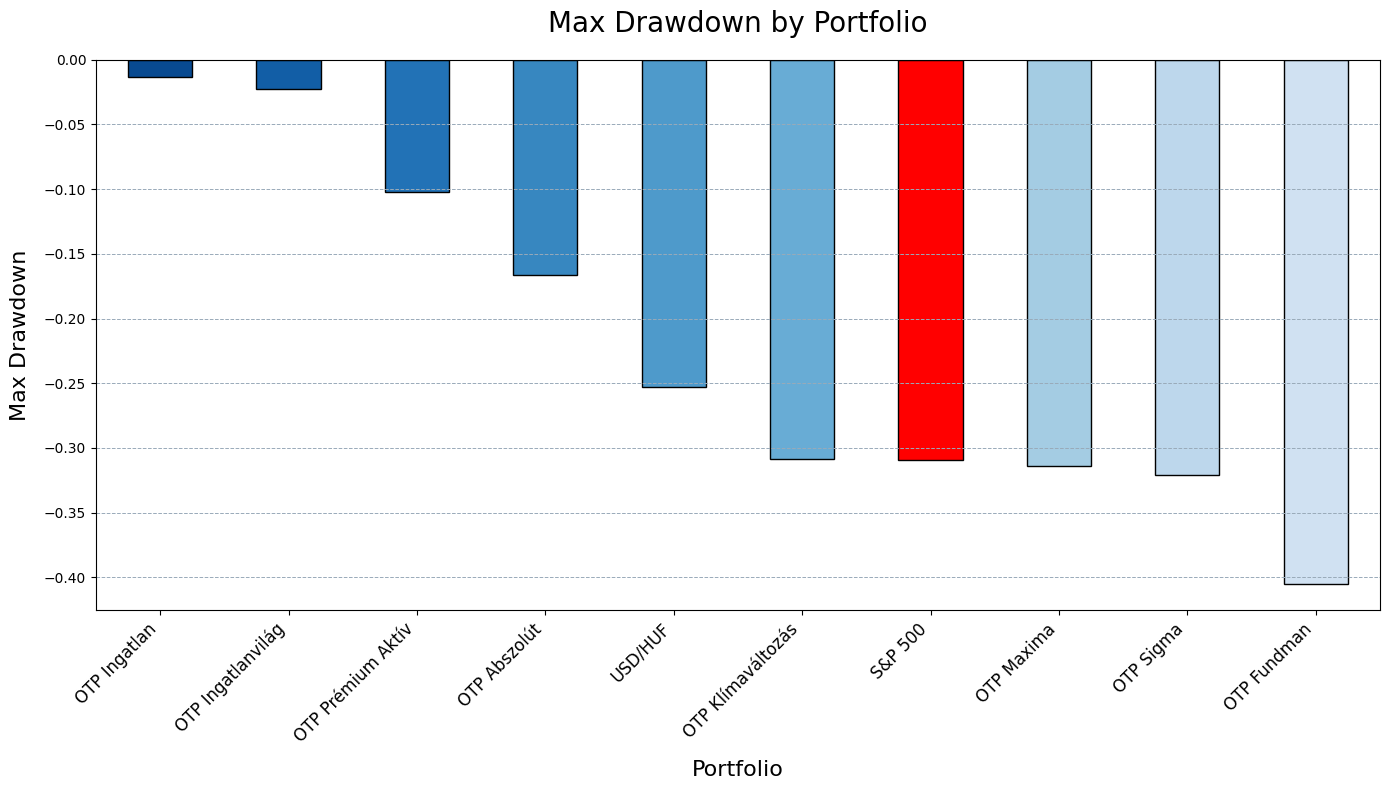

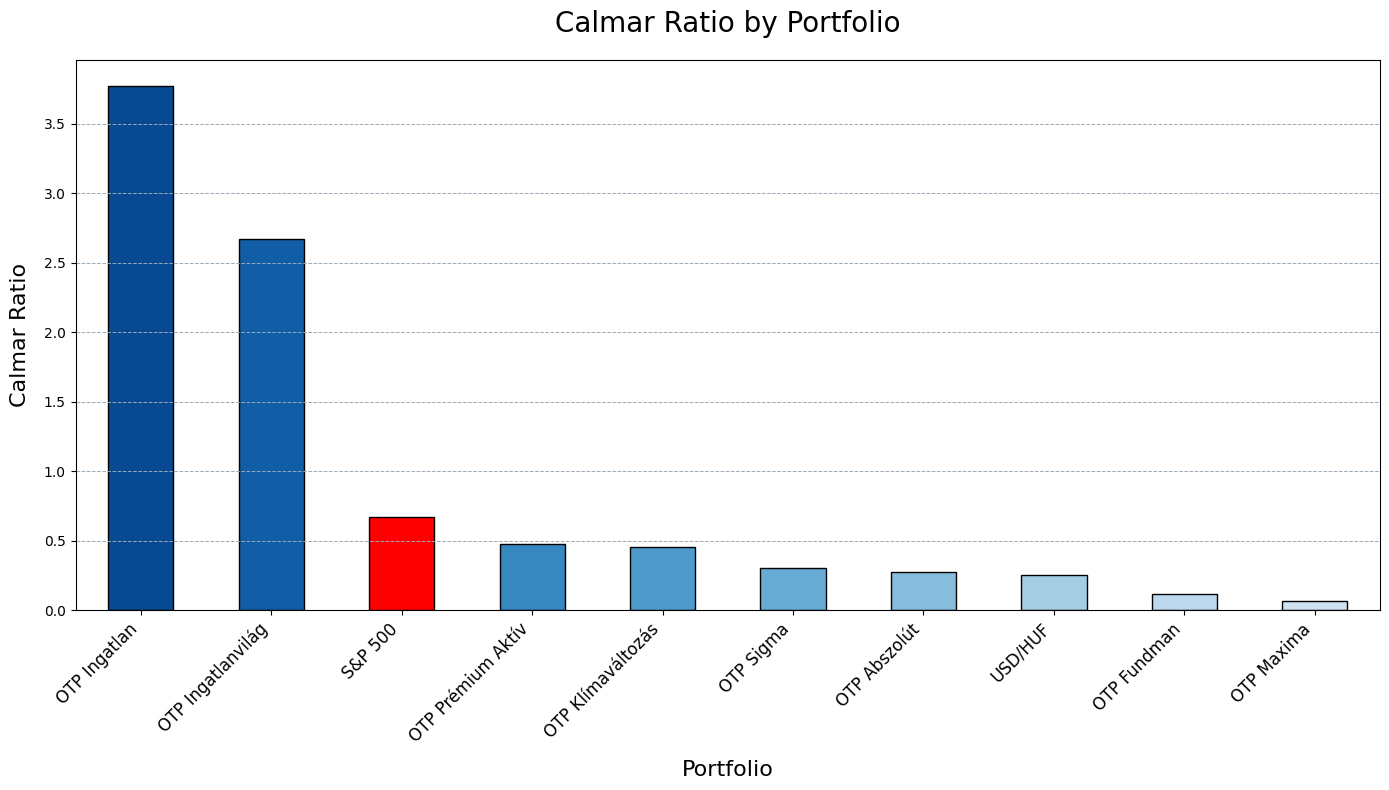

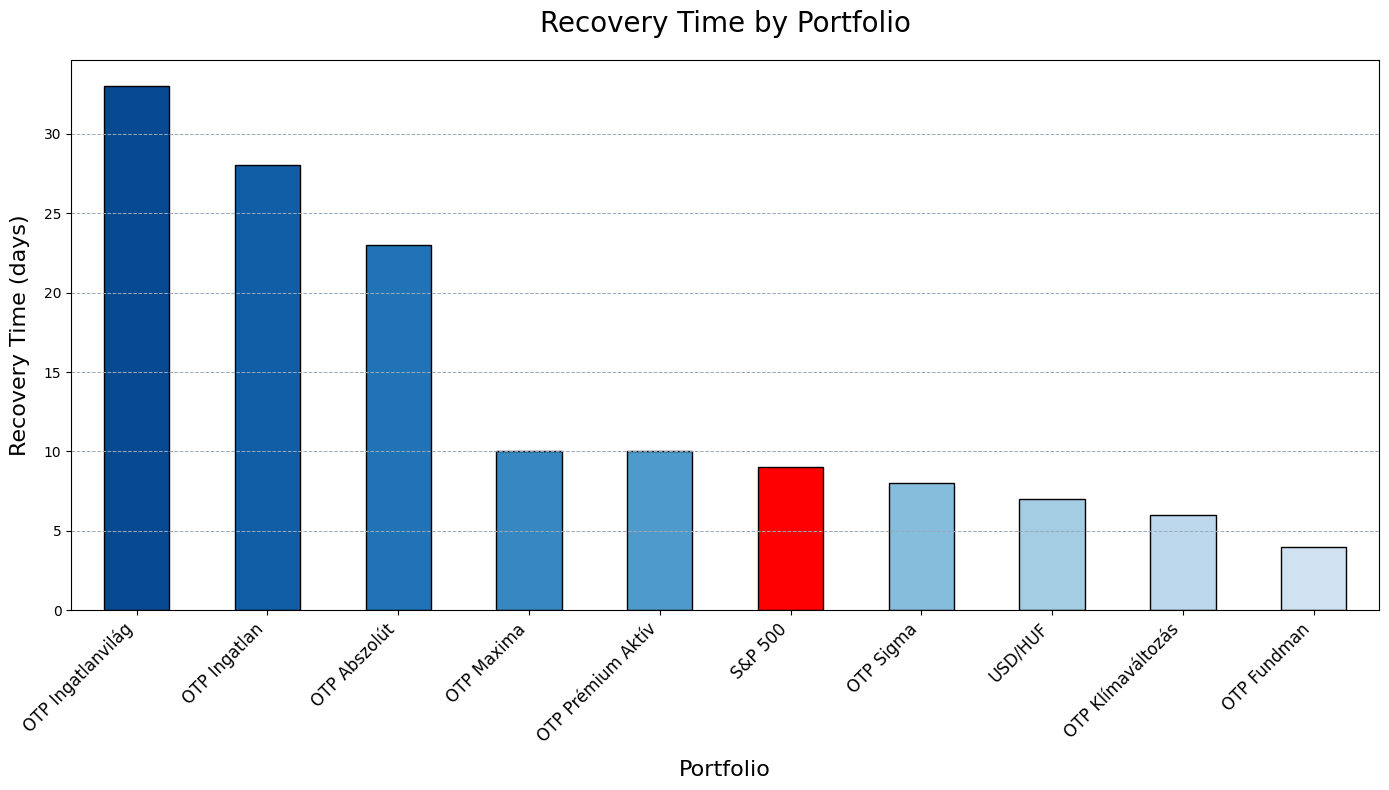

In [130]:

def max_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown_value = drawdown.min()
    return max_drawdown_value

# Apply the Max Drawdown function to each portfolio
max_drawdowns = daily_returns.apply(max_drawdown)
print("Max Drawdowns:\n", max_drawdowns)

# 2. Calmar Ratio
def calmar_ratio(annualized_return, max_drawdown):
    return annualized_return / abs(max_drawdown)

# Calculate the annualized return for each portfolio
annualized_returns = daily_returns.mean() * 252

# Apply the Calmar Ratio function to each portfolio
calmar_ratios = pd.Series({col: calmar_ratio(annualized_returns[col], max_drawdowns[col]) for col in daily_returns.columns})
print("Calmar Ratios:\n", calmar_ratios)

# 3. Recovery Time Analysis
def recovery_time(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    recovery_time = (drawdown == 0).astype(int).groupby(drawdown.ne(0).cumsum()).cumsum().max()
    return recovery_time

# Apply the Recovery Time function to each portfolio
recovery_times = daily_returns.apply(recovery_time)
print("Recovery Times:\n", recovery_times)

# Visualization
draw_decreasing_barchart(max_drawdowns, "Max Drawdown by Portfolio", "Portfolio", "Max Drawdown")
draw_decreasing_barchart(calmar_ratios, "Calmar Ratio by Portfolio", "Portfolio", "Calmar Ratio")
draw_decreasing_barchart(recovery_times, "Recovery Time by Portfolio", "Portfolio", "Recovery Time (days)")


33
OTP Abszolút 0.004661202102253219 0.00018332665938449266
OTP Fundman 0.012608275868545819 0.0001934452012578968
OTP Ingatlan 0.0006467902023533538 0.0001983281397007975
OTP Ingatlanvilág 0.0008911524293822755 0.00024177509718686016
OTP Klímaváltozás 0.013658174416783327 0.0005561173194114605
OTP Maxima 0.003931767143581515 8.635865981376913e-05
OTP Prémium Aktív 0.0030291297501229015 0.00019356159539553542
OTP Sigma 0.01044464842633999 0.0003870851636881313
S&P 500 0.014559183639828433 0.0008240805068484311
USD/HUF 0.007777007619405173 0.00025147621206299687


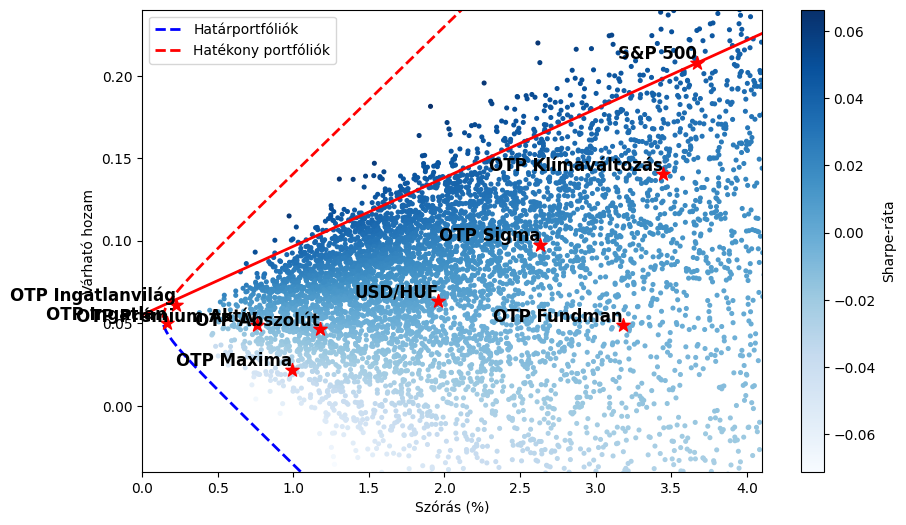

In [131]:

def calculate_returns(data):
    return data.pct_change().dropna()

def portfolio_statistics(weights, returns, covariance):
    portfolio_return = np.dot(weights, returns.mean()) * 252  # Annualized return
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance, weights))) * np.sqrt(252)  # Annualized volatility
    return portfolio_return, portfolio_volatility

def efficient_frontier(returns, num_portfolios, risk_free_rate):
    cov_matrix = returns.cov() * 252  # Annualize the covariance matrix
    expected_returns = returns.mean() * 252  # Annualize the returns
    num_assets = len(expected_returns)
    results = np.zeros((4, num_portfolios))

    for i in range(num_portfolios):
        weights = np.random.randn(num_assets)*1000
        weights /= np.sum(weights)        
        portfolio_return, portfolio_volatility = portfolio_statistics(weights, returns, cov_matrix)
        results[0,i] = portfolio_volatility
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_volatility  # Sharpe ratio

    return results

def minimum_variance_portfolio(cov_matrix):
    num_assets = len(cov_matrix)
    args = (cov_matrix,)
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = minimize(lambda weights, cov: np.dot(weights.T, np.dot(cov, weights)),
                      num_assets * [1. / num_assets,],
                      args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

def market_portfolio(returns, covariance, risk_free_rate):
    num_assets = len(returns)
    args = (returns, covariance, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = minimize(lambda weights, returns, cov, rf: -(np.dot(weights, returns) - rf) / np.sqrt(np.dot(weights.T, np.dot(cov, weights))),
                      num_assets * [1. / num_assets,],
                      args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

def plot_efficient_frontier(results, exact_frontier_returns, exact_frontier_volatilities, 
                            mvp_return, mvp_volatility, market_return, market_volatility, 
                            risk_free_rate, min_x, max_x, min_y, max_y,returns, tickers, interesting):
    plt.figure(figsize=(10, 6))
    plt.xlim(min_x, max_x )  # Volatility range
    plt.ylim(min_y, max_y )  # Expected return range

    plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='Blues', marker='o', s=7, alpha=1)
    plt.colorbar(label='Sharpe-ráta')
    min_vol =  np.array(exact_frontier_volatilities).min()
    min_vol_pos = np.where(np.array(exact_frontier_volatilities) == min_vol)[0][0]
    print(min_vol_pos)
    plt.plot(exact_frontier_volatilities[:min_vol_pos], exact_frontier_returns[:min_vol_pos], 'b--', label='Határportfóliók', linewidth=2)
    
    plt.plot(exact_frontier_volatilities[min_vol_pos:], exact_frontier_returns[min_vol_pos:], 'r--', label='Hatékony portfóliók', linewidth=2)
    for tick in tickers:
        # if tick == benchmark:
        #    continue
        print(tick, np.sqrt(returns[tick].var()),  returns[tick].mean())
        plt.scatter(np.sqrt(returns[tick].var())* 252, returns[tick].mean()* 252, color='red', marker='*', s=100, zorder=2, )
        if tick  in interesting:
            if tick not in ['Citadella', 'Accord Prizma', 'OTP Supra', 'Platina Delta']:
                plt.text(np.sqrt(returns[tick].var())* 252, returns[tick].mean()* 252, tick, fontsize=12, fontweight="bold", verticalalignment='bottom', horizontalalignment='right', color='black')

            else:
                plt.text(np.sqrt(returns[tick].var())* 252, returns[tick].mean()* 252, tick, fontsize=12, fontweight="bold", verticalalignment='top', horizontalalignment='left', color='black')
        
    sample2_volatility, sample2_return= np.sqrt(returns[benchmark].var())*252,returns[benchmark].mean()*252
    cal_x = np.linspace(min_x, max_x, 100)
    cal_y = risk_free_rate + (sample2_return - risk_free_rate) / sample2_volatility * cal_x
    plt.plot(cal_x, cal_y, color='red', linestyle='-', zorder=1, linewidth=2)
    plt.xlabel('Szórás (%)')
    plt.ylabel('Várható hozam')
    plt.legend()
# interesting = ['Citadella', 'HOLD Columbus', 'HOLD Orion', 'Platina Delta', 'Accorde Prizma', 'OTP Supra', 'Erste Duett', benchmark ]
num_portfolios=10000
min_x, max_x = 0, 4.1
min_y, max_y = -0.04, 0.24
# tickers = interesting
returns = calculate_returns(df)
results = efficient_frontier(returns, num_portfolios, annual_risk_free_rate)
mu = returns.mean() * 252  
Sigma = returns.cov() * 252  
Sigma_inv = np.linalg.inv(Sigma)
ones = np.ones(len(mu))
U = np.vstack([mu, ones]).T
M = U.T@ (Sigma_inv@ U)
M_inv = np.linalg.inv(M)
desired_returns = np.linspace(min_y, max_y , 100)
exact_weights_list = []
exact_risk_list = []

for desired_return in desired_returns:
    u = np.array([desired_return, 1])
    w_star = Sigma_inv@ U@ M_inv@u
    # print(w_star)
    portfolio_risk = np.sqrt(np.dot(w_star.T, np.dot(Sigma, w_star))) * np.sqrt(252)
    exact_weights_list.append(w_star)
    exact_risk_list.append(portfolio_risk)

mvp_weights = minimum_variance_portfolio(Sigma)
mvp_return, mvp_volatility = portfolio_statistics(mvp_weights, returns, Sigma)
market_weights = market_portfolio(mu, Sigma, annual_risk_free_rate)
market_return, market_volatility = portfolio_statistics(market_weights, returns, Sigma)
plot_efficient_frontier(results, desired_returns, exact_risk_list, mvp_return, mvp_volatility, market_return, market_volatility, annual_risk_free_rate, min_x, max_x, min_y, max_y, returns, list(df.columns), list(df.columns))

plt.show()


In [132]:
mu

OTP Abszolút         0.046198
OTP Fundman          0.048748
OTP Ingatlan         0.049979
OTP Ingatlanvilág    0.060927
OTP Klímaváltozás    0.140142
OTP Maxima           0.021762
OTP Prémium Aktív    0.048778
OTP Sigma            0.097545
S&P 500              0.207668
USD/HUF              0.063372
dtype: float64